# Taller 1: Aprendizaje Profundo
### **Profesor:** Ing. Julio Omar Palacio Niño
### **Estudiante:** Jesús Ernesto Suárez Triana

El objetivo del siguiente taller es hacer un análisis de clasificación empleando redes neuronales feed-forward

## 1. Comprensión del Dataset
Se trabajará con el dataset de la página Kaggle, por lo cual deberá ser descargado del
siguiente enlace
[link_kaggle_dataset](https://www.kaggle.com/crowdflower/twitter-user-gender-classification/)

 

In [69]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Para categorizar columnas a modelos
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import plot_model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
# Read Data
path = 'gender-classifier-DFE-791531.csv'
data = pd.read_csv(path,encoding="latin1", nrows=5000)
print('Info Dataset')
print(data.info())
data.head()

Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               5000 non-null   int64  
 1   _golden                5000 non-null   bool   
 2   _unit_state            5000 non-null   object 
 3   _trusted_judgments     5000 non-null   int64  
 4   _last_judgment_at      5000 non-null   object 
 5   gender                 4964 non-null   object 
 6   gender:confidence      4991 non-null   float64
 7   profile_yn             5000 non-null   object 
 8   profile_yn:confidence  5000 non-null   float64
 9   created                5000 non-null   object 
 10  description            4329 non-null   object 
 11  fav_number             5000 non-null   int64  
 12  gender_gold            0 non-null      float64
 13  link_color             5000 non-null   object 
 14  name                   5000 non-null   obje

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


## 2. Comprensión del dataset

- ¿Qué información presenta el dataset?, describir las principales características
del dataset, y a su vez identificar la variable sobre la cual se desea hacer la
predicción.


**Respuesta**

Acorde a la página de Kaggle, este es un dataset construido para *CrowdFlower*. Para el, se pidio a los colaboradores ver un perfil de Twitter y decidir si el usuario era un hombre, una mujer o una marca (no individual). 

El dataset esta compuesto por 20050 registros y 26 filas. 

El diccionario de datos es el siguiente: 

- **unitid:** un identificador único para el usuario
- **_golden:** si el usuario se incluyó en el estándar de oro para el modelo; TRUE o FALSE
- **unitstate:** estado de la observación; uno de finalizado (para las observaciones juzgadas por los colaboradores) o dorado (para las observaciones del patrón oro)
- **trustedjudgments:** número de juicios de confianza (int); siempre 3 para las observaciones no doradas, y lo que puede ser un identificador único para las observaciones del patrón oro
- **lastjudgment_at:** fecha y hora de la última sentencia del contribuyente; en blanco para las observaciones gold standard
- **gender:** uno de los siguientes: hombre, mujer o marca (para perfiles no humanos)
- **gender:confidence:** un flotador que representa la confianza en el género proporcionado
- **profile_yn:** "no" parece significar que el perfil debía formar parte del conjunto de datos pero no estaba disponible cuando los colaboradores fueron a juzgarlo
- **profile_yn:confidence:** confianza en la existencia/no existencia del perfil
- **created:** fecha y hora de creación del perfil
- **description:** descripción del perfil del usuario
- **fav_number:** número de tuits que el usuario ha favorecido
- **gender_gold:** si el perfil es dorado, ¿cuál es el género?
- **link_color:** el color del enlace en el perfil, como valor hexadecimal
- **name:** el nombre del usuario
- **profileyngold:** si el valor y/n del perfil es dorado
- **profileimage:** un enlace a la imagen del perfil
- **retweet_count:** número de veces que el usuario ha retuiteado (o posiblemente, ha sido retuiteado)
- **sidebar_color:** color de la barra lateral del perfil, como valor hexadecimal
- **text:** texto de uno de los tweets del usuario al azar
- **tweet_coord:** si el usuario tiene activada la localización, las coordenadas como una cadena con el formato "[latitud, longitud]"
- **tweet_count:** número de tweets que el usuario ha publicado
- **tweet_created:** cuándo se creó el tweet aleatorio (en la columna de texto)
- **tweet_id:** el id del tweet aleatorio
- **tweet_location:** ubicación del tweet; parece que no está especialmente normalizado
- **user_timezone:** la zona horaria del usuario

De la vista previa del Dataset, podemos entender que el dataset tiene como unidad de medida usuarios unicos y las caracteristicas, corresponden a información general asociada a la cuenta del usuario. 

También, para el objetivo de clasificación de registros basados en el genero, podemos identificar que la variable target en nuestro caso es **gender**

Como caracteristicas generales del dataset, observamos que: 
- Tenemos 17 campos string, 5 enteros, 3 flotante y 1 booleano. 
- De las variables númericas resaltamos la importancia de las variables *fav_number, retweet_count*  (No contamos las demás, por naturaleza de la obtención de la data y en particular *gender:confidence* hace relación a la obtención del genero, pero en si no genera una relación al genero en si.)
- De las variables categoricas y teniendo en cuenta el objetivo del ejercicio, consideramos importantes las variables de *link_color y sidebar_color*
- **nota** No incluimos las variables de texto, y realizar un análisis de sentimiento previo, con el fín de simplificar el ejercicio. 

In [5]:
print('Conteo de Tipos de datos')
data.dtypes.value_counts()

Conteo de Tipos de datos


object     15
int64       5
float64     5
bool        1
dtype: int64

In [6]:
print('Univariado variables númericas (Entero y Flotante)')
data.describe()

Univariado variables númericas (Entero y Flotante)


,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,gender_gold,profile_yn_gold,retweet_count,tweet_count,tweet_id
count,5.000000e+03,5000.0,4991.000000,5000.000000,5000.000000,0.0,0.0,5000.000000,5.000000e+03,5.000000e+03
mean,8.157218e+08,3.0,0.887540,0.991837,4443.594600,NaN,NaN,0.101200,3.774460e+04,6.587300e+17
std,1.471170e+03,0.0,0.192198,0.051670,12879.525741,NaN,NaN,4.679587,1.249624e+05,4.224422e+04
min,8.157192e+08,3.0,0.000000,0.632300,0.000000,NaN,NaN,0.000000,1.000000e+00,6.587300e+17
25%,8.157205e+08,3.0,0.679200,1.000000,24.000000,NaN,NaN,0.000000,2.219750e+03,6.587300e+17
50%,8.157218e+08,3.0,1.000000,1.000000,504.500000,NaN,NaN,0.000000,9.538000e+03,6.587300e+17
75%,8.157230e+08,3.0,1.000000,1.000000,3385.000000,NaN,NaN,0.000000,3.599825e+04,6.587300e+17
max,8.157243e+08,3.0,1.000000,1.000000,341621.000000,NaN,NaN,330.000000,2.372591e+06,6.587300e+17


In [7]:
print('Univariado variables String y Bool')
data.describe(include = ['object','bool']).transpose()

Univariado variables String y Bool


,count,unique,top,freq
_golden,5000,1,False,5000
_unit_state,5000,1,finalized,5000
_last_judgment_at,5000,281,10/26/15 23:05,53
gender,4964,4,male,1763
profile_yn,5000,2,yes,4964
created,5000,4764,4/13/10 2:10,18
description,4329,4104,"You can be spiritually empowered, financially ...",33
link_color,5000,906,0084B4,2277
name,5000,4771,naijama,18
profileimage,5000,4635,https://abs.twimg.com/sticky/default_profile_i...,29


- Realice un análisis grafico que permita ver la distribución y ver las correlaciones

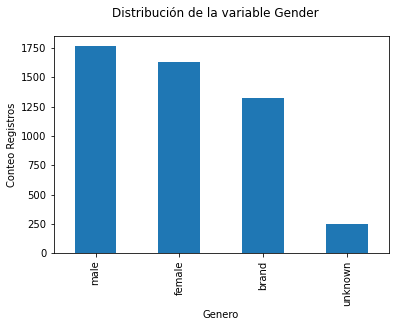

In [8]:
pd.value_counts(data['gender']).plot(kind='bar')
plt.suptitle('Distribución de la variable Gender')
plt.xlabel('Genero')
plt.ylabel('Conteo Registros')
plt.show() 

Relación de distribución de Genero con otras variables
----------------------------------------------------------------------------------------------------
numero de gráficos: 25


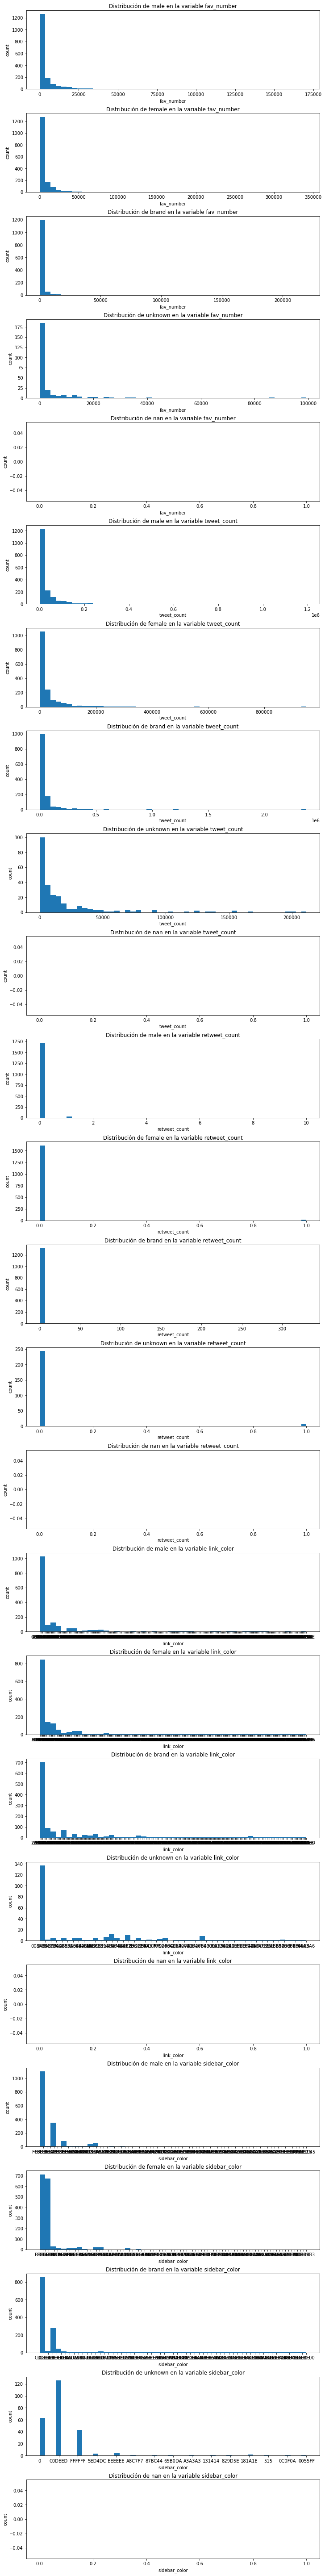

In [9]:
print('Relación de distribución de Genero con otras variables') 
print('-'*100)
var_interest = ['fav_number', 'tweet_count',  'retweet_count', 'link_color', 'sidebar_color']
num_cat_gender = len(data.gender.unique())
num_plots = num_cat_gender * len(var_interest)
print(f'numero de gráficos: {num_plots}')
fig , ax = plt.subplots(num_plots, figsize=(10, 80), constrained_layout=True)
#fig.tight_layout()


i = 0
for j in var_interest:
    for gender_ in range(num_cat_gender):
        idd = data.gender.unique()[gender_]
        ax[i].hist(data.loc[data.gender == idd, j], bins=50)
        ax[i].set_title(f'Distribución de {idd} en la variable {j}')
        ax[i].set_ylabel('count')
        ax[i].set_xlabel(j)
        i += 1
                     
plt.show()

#delete variables
del num_cat_gender, num_plots, i, j, gender_

In [10]:
#ajustando variables categoricas para correlación
var_interest_cat = ['gender', 'link_color', 'sidebar_color']
var_cat = list()
for col in var_interest_cat:
    labels = data[col].value_counts(ascending=True).index.tolist()
    codes = range(1,len(labels)+1)
    data[col +'_cat'] = data[col].replace(labels,codes)
    var_cat.append(col +'_cat')

del col, labels, codes

Relación de correlación
----------------------------------------------------------------------------------------------------


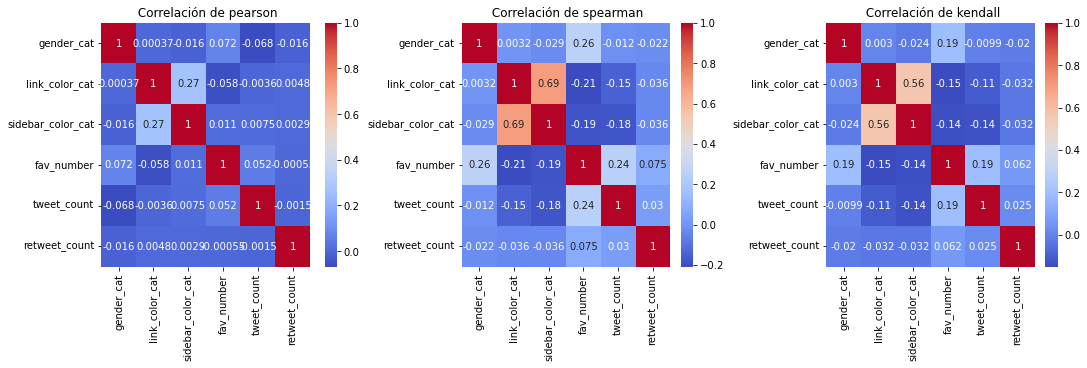

In [11]:
print('Relación de correlación')
print('-'*100)
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15,5),  constrained_layout=True)

corr_ = ['pearson', 'spearman', 'kendall']
for i in range(len(corr_)):
    sns.heatmap(data[var_cat + var_interest].corr(method=corr_[i]),
                annot=True, cmap='coolwarm', ax=ax[i])
    ax[i].set_title(f' Correlación de {corr_[i]}')

# sns.heatmap(data[var_cat + var_interest].corr(method='spearman'),
#             annot=True, cmap='coolwarm', ax=ax[1])

# sns.heatmap(data[var_cat + var_interest].corr(method='kendall'),
#             annot=True, cmap='coolwarm', ax=ax[2])
plt.show()

**Comentarios**

Despues de realizar un análisis de distribución y de correlación de las variables que consideramos de interes, podemos resaltar los siguientes casos: 

- La variable respuesta requiere una limpieza previa con respecto a la categoría NaN que no representa aporte al ejercicio (Por fortuna es menos del 10% de la base). 
- Dado que la correlación se hace entre variables categoricas no ordinales, la mejor correlación a estudiar es la de Kendall, la cual nos muestra la no correlación entre las variables. Solamente vemos una relación positiva alta para link_color y sidebar_color, pero con respecto a la variable de interes es baja. Lo cual es bueno, para evitar problemas de sobrepeso de una variable en el ejercicio de redes. 
- La distribución de las covariables con respecto al genero, no varía, salvo en la cantidad de frecuencia, lo cual puede llevar a futuro a un bajo nivel de accuracy al momento de clasificar. 

## 3. Limpieza de datos

De las variables que componen el problema cuales pueden ser implementadas para la construcción del modelo, justifique la respuesta.

In [12]:
# Limpieza de registros
print(data.shape)
idd = data.gender.isnull() == False # registros problemas de target
data = data.loc[idd]
print(data.loc[data.gender.isnull() == True].shape)

(5000, 29)
(0, 29)


In [13]:
col_x = ['link_color', 'sidebar_color', 'fav_number', 'retweet_count', 'tweet_count']
col_y = 'gender'
print('Variables seleccionadas y target')
print('-'*100)
print(data[col_x + [col_y]].info())
data_model = data[col_x + [col_y]]

Variables seleccionadas y target
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4964 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   link_color     4964 non-null   object
 1   sidebar_color  4964 non-null   object
 2   fav_number     4964 non-null   int64 
 3   retweet_count  4964 non-null   int64 
 4   tweet_count    4964 non-null   int64 
 5   gender         4964 non-null   object
dtypes: int64(3), object(3)
memory usage: 271.5+ KB
None


## 4. Utilización variables categóricas

Revisando las variables del problema realice una transformación de las variables
categóricas para que puedan ser analizadas en el problema y volver a construir el
modelo

In [14]:
# prepare input data
def prepare_data(data_):
    ohe = OneHotEncoder()
    ohe.fit(data_)
    data_enc = ohe.transform(data_)
    return data_enc.todense()


In [15]:
target = 'gender'

In [16]:
X = prepare_data(data_model.loc[:,data_model.columns != target])
y = prepare_data(data_model.loc[:,data_model.columns == target])

In [16]:
# ## Version manual 
# def cast_cat(col):
#     global data_model
#     labels = data_model[col].value_counts(ascending=True).index.tolist()
#     codes = range(1,len(labels)+1)
#     data_model[col+ '_cat'] = data_model[col].replace(labels,codes)
    
# #Include only no numeric variables
# for col in ['link_color', 'sidebar_color', 'gender']:
#     cast_cat(col)
    
# print(data_model.info())
# data_model.head()

**Comentarios**
Despues de Limpiar y categorizar las variables, para la creación del modelo, usaremos las variables: 

*Target*
- gender_cat
*Features*
- fav_number
- retweet_count
- tweet_count
- link_color_cat
- 
sidebar_color_cat

## 5. Construcción del dataset

Para realizar el análisis de clasificación se sugiere realizar un particionamiento entre
dos conjuntos (entrenamiento, pruebas) o tres conjuntos de entrenamiento,
(entrenamiento, validación, pruebas)
- ¿Qué diferencia hay en usar un conjunto de validación?
- ¿mejora los resultados en la construcción del modelo usar un conjunto de
validación?
- ¿Qué información provee el uso de un conjunto de validación?

In [17]:
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.3, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=1)

print(f'Training   X= {X_train.shape}, y = {y_train.shape}')
print(f'Test   X= {X_test.shape}, y = {y_test.shape}')
print(f'Validation   X= {X_val.shape}, y = {y_val.shape}')
# prepare input data

Training   X= (3474, 7910), y = (3474, 4)
Test   X= (745, 7910), y = (745, 4)
Validation   X= (745, 7910), y = (745, 4)


In [18]:
## Ajuste de escalas
sc=StandardScaler()
X_train=sc.fit_transform(X_train)#, with_mean=False)
X_test=sc.transform(X_test)
X_val=sc.transform(X_val)

/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generat

**Comentarios**
- El usar un conjunto de validación, es la prueba final de ajuste del modelo, mientras el proceso de training y test permiten crear el modelo y validarlo, durante la cración del mismo. La muestra de validación, permite un chequeo final, como si los datos entraran a producción, para tener los resultados finales del modelo propuesto. 
- Al usar una muestra de validación, permite al investigador realizar ajustes o modificaciones sobre el modelo, ya que es la muestra que tiene como evidencia de como se comporta el fenomeno de estudio, permitiendo modificar la arquitectura construida y así mejorar los resultados. 
- Evalua el comportamiento del modelo ya entrenado y validado con la muestra de test. 

## 6. Elaboración del modelo
Diseñar diferentes soluciones empleando diferentes arquitecturas
#### Perceptrón


In [19]:
print(X.shape)
perceptron_model = Sequential()
perceptron_model.add(Dense(4, input_dim= X.shape[1], activation='softmax'))

(4964, 7910)


2022-03-27 20:01:00.002627: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-27 20:01:00.003028: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [20]:
perceptron_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 31644     
Total params: 31,644
Trainable params: 31,644
Non-trainable params: 0
_________________________________________________________________


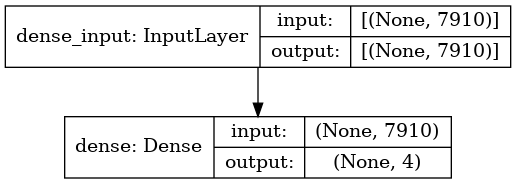

In [21]:
plot_model(perceptron_model, show_shapes=True, show_layer_names=True)

In [22]:
perceptron_model.compile(loss = 'categorical_crossentropy',
                         optimizer='sgd',
                         metrics=['accuracy'])

In [23]:
%%time
perceptron_model.fit(X_train, y_train, epochs = 30, batch_size=16, verbose=2)

2022-03-27 20:01:10.861696: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-27 20:01:10.880602: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299965000 Hz


Epoch 1/30
218/218 - 0s - loss: 1.8930 - accuracy: 0.2617
Epoch 2/30
218/218 - 0s - loss: 0.2285 - accuracy: 0.9577
Epoch 3/30
218/218 - 0s - loss: 0.1311 - accuracy: 0.9718
Epoch 4/30
218/218 - 0s - loss: 0.1029 - accuracy: 0.9781
Epoch 5/30
218/218 - 0s - loss: 0.0869 - accuracy: 0.9799
Epoch 6/30
218/218 - 0s - loss: 0.0759 - accuracy: 0.9816
Epoch 7/30
218/218 - 0s - loss: 0.0688 - accuracy: 0.9839
Epoch 8/30
218/218 - 0s - loss: 0.0635 - accuracy: 0.9850
Epoch 9/30
218/218 - 0s - loss: 0.0591 - accuracy: 0.9868
Epoch 10/30
218/218 - 0s - loss: 0.0546 - accuracy: 0.9856
Epoch 11/30
218/218 - 0s - loss: 0.0527 - accuracy: 0.9859
Epoch 12/30
218/218 - 0s - loss: 0.0501 - accuracy: 0.9873
Epoch 13/30
218/218 - 0s - loss: 0.0472 - accuracy: 0.9893
Epoch 14/30
218/218 - 0s - loss: 0.0461 - accuracy: 0.9882
Epoch 15/30
218/218 - 0s - loss: 0.0432 - accuracy: 0.9896
Epoch 16/30
218/218 - 0s - loss: 0.0420 - accuracy: 0.9888
Epoch 17/30
218/218 - 0s - loss: 0.0406 - accuracy: 0.9899
Epoch 

In [24]:
_ = perceptron_model.evaluate(X_test, y_test, verbose=2)

24/24 - 0s - loss: 1.6856 - accuracy: 0.4403


#### Red neuronal con una capa oculta con un numero de neuronas igual al numero de entradas

In [31]:
print(X.shape)
model_2 = Sequential()
model_2.add(Dense(X.shape[1], input_dim= X.shape[1], activation='softmax'))
model_2.add(Dense(4, input_dim= X.shape[1], activation='softmax'))

(4964, 7910)


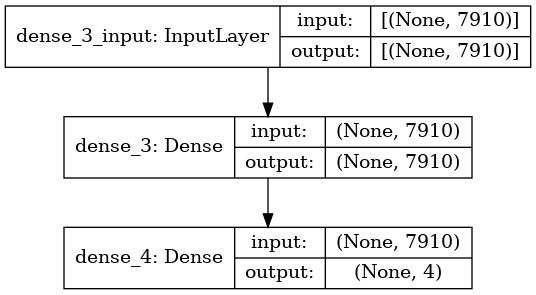

In [32]:
plot_model(model_2, show_shapes=True, show_layer_names=True)

In [39]:
model_2.compile(loss = 'categorical_crossentropy',
                         optimizer='sgd',
                         metrics=['accuracy'])

In [40]:
%%time
model_2.fit(X_train, y_train, epochs = 30, batch_size=16, verbose=2)

Epoch 1/30
218/218 - 31s - loss: 1.3413 - accuracy: 0.3506
Epoch 2/30
218/218 - 29s - loss: 1.2897 - accuracy: 0.3520
Epoch 3/30
218/218 - 29s - loss: 1.2668 - accuracy: 0.3520
Epoch 4/30
218/218 - 29s - loss: 1.2548 - accuracy: 0.3520
Epoch 5/30
218/218 - 29s - loss: 1.2481 - accuracy: 0.3520
Epoch 6/30
218/218 - 29s - loss: 1.2440 - accuracy: 0.3520
Epoch 7/30
218/218 - 29s - loss: 1.2413 - accuracy: 0.3520
Epoch 8/30
218/218 - 29s - loss: 1.2396 - accuracy: 0.3520
Epoch 9/30
218/218 - 29s - loss: 1.2384 - accuracy: 0.3520
Epoch 10/30
218/218 - 29s - loss: 1.2376 - accuracy: 0.3520
Epoch 11/30
218/218 - 29s - loss: 1.2369 - accuracy: 0.3520
Epoch 12/30
218/218 - 29s - loss: 1.2366 - accuracy: 0.3520
Epoch 13/30
218/218 - 29s - loss: 1.2363 - accuracy: 0.3520
Epoch 14/30
218/218 - 29s - loss: 1.2361 - accuracy: 0.3520
Epoch 15/30
218/218 - 30s - loss: 1.2359 - accuracy: 0.3520
Epoch 16/30
218/218 - 29s - loss: 1.2358 - accuracy: 0.3520
Epoch 17/30
218/218 - 29s - loss: 1.2357 - accura

In [41]:
_ = model_2.evaluate(X_test, y_test, verbose=2)_ = model_3.evaluate(X_test, y_test, verbose=2)

24/24 - 1s - loss: 1.2405 - accuracy: 0.3544


#### Red neuronal con dos capas ocultas, la primera con 5 neuronas y la segunda capa oculta con 5 neuronas

In [62]:
print(X.shape)
model_3 = Sequential()
model_3.add(Dense(5, input_dim= X.shape[1], activation='sigmoid'))
model_3.add(Dense(5, input_dim= X.shape[1], activation='sigmoid'))
model_3.add(Dense(4, input_dim= X.shape[1], activation='softmax'))

(4964, 7910)


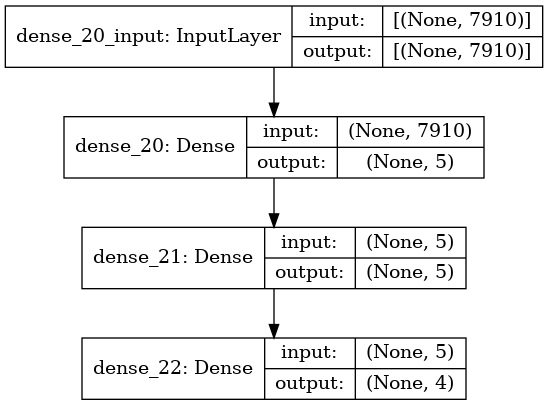

In [63]:
plot_model(model_3, show_shapes=True, show_layer_names=True)

In [64]:
model_3.compile(loss = 'categorical_crossentropy',
                         optimizer='sgd',
                         metrics=['accuracy'])

In [65]:
%%time
model_3.fit(X_train, y_train, epochs = 30, batch_size=16, verbose=2)

Epoch 1/30
218/218 - 0s - loss: 1.2654 - accuracy: 0.3339
Epoch 2/30
218/218 - 0s - loss: 1.2354 - accuracy: 0.3661
Epoch 3/30
218/218 - 0s - loss: 1.2217 - accuracy: 0.3739
Epoch 4/30
218/218 - 0s - loss: 1.2108 - accuracy: 0.3805
Epoch 5/30
218/218 - 0s - loss: 1.1999 - accuracy: 0.4056
Epoch 6/30
218/218 - 0s - loss: 1.1875 - accuracy: 0.4470
Epoch 7/30
218/218 - 0s - loss: 1.1735 - accuracy: 0.4588
Epoch 8/30
218/218 - 0s - loss: 1.1564 - accuracy: 0.4876
Epoch 9/30
218/218 - 0s - loss: 1.1360 - accuracy: 0.5982
Epoch 10/30
218/218 - 0s - loss: 1.1117 - accuracy: 0.6431
Epoch 11/30
218/218 - 0s - loss: 1.0829 - accuracy: 0.6851
Epoch 12/30
218/218 - 0s - loss: 1.0499 - accuracy: 0.7320
Epoch 13/30
218/218 - 0s - loss: 1.0127 - accuracy: 0.7386
Epoch 14/30
218/218 - 0s - loss: 0.9729 - accuracy: 0.7461
Epoch 15/30
218/218 - 0s - loss: 0.9316 - accuracy: 0.7694
Epoch 16/30
218/218 - 0s - loss: 0.8905 - accuracy: 0.7766
Epoch 17/30
218/218 - 0s - loss: 0.8507 - accuracy: 0.8020
Epoch 

In [66]:
_ = model_3.evaluate(X_test, y_test, verbose=2)

24/24 - 0s - loss: 1.3206 - accuracy: 0.4201


## 7. Análisis de Resultados
Construya la matriz de confusión, realice las metricas de evaluación (acuraccy,
precisión, recall, f1 score) para cada uno de los modelos.
Realice un análisis comparativo de cada uno de los resultados de cada modelo.

In [72]:
def evaluacion_models(model):
    global X_train, X_test, y_train, y_test
    y_pred=model.predict(X_test)
    y_pred = np.round(y_pred)

    cm= confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
    print('Matriz de confusión')
    print('-'*100)
    print(cm)
    print('-'*100)
    print('Evaluación del modelo')
    print('-'*100)
    scores = model.evaluate(X_train, y_train)
    print("TRAINING \n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    scores = model.evaluate(X_test, y_test)
    print("TESTING \n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    print('-'*100)
    print('Metricas de Evaluación del modelo')
    print('-'*100)
    print(classification_report(y_pred,y_test))

In [73]:
print('-'*100)
print('Perceptron')
print('-'*100)
evaluacion_models(perceptron_model)

print('-'*100)
print('1 capa densa mismas neuronas que features')
print('-'*100)
evaluacion_models(model_2)

print('-'*100)
print('dos capas densas de 5 neuronas cada una ')
print('-'*100)
evaluacion_models(model_3)

----------------------------------------------------------------------------------------------------
Perceptron
----------------------------------------------------------------------------------------------------
Matriz de confusión
----------------------------------------------------------------------------------------------------
[[114  24  47   5]
 [126  72  47   6]
 [137  46  73   8]
 [ 15  10  12   3]]
----------------------------------------------------------------------------------------------------
Evaluación del modelo
----------------------------------------------------------------------------------------------------
109/109 [==============================] - 0s 921us/step - loss: 0.0165 - accuracy: 0.9948
TRAINING 
accuracy: 99.48%
24/24 [==============================] - 0s 1ms/step - loss: 1.9105 - accuracy: 0.4416
TESTING 
accuracy: 44.16%
----------------------------------------------------------------------------------------------------
Metricas de Evaluación del modelo

/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Matriz de confusión
----------------------------------------------------------------------------------------------------
[[190   0   0   0]
 [251   0   0   0]
 [264   0   0   0]
 [ 40   0   0   0]]
----------------------------------------------------------------------------------------------------
Evaluación del modelo
----------------------------------------------------------------------------------------------------
109/109 [==============================] - 4s 41ms/step - loss: 1.2353 - accuracy: 0.3520
TRAINING 
accuracy: 35.20%
24/24 [==============================] - 1s 43ms/step - loss: 1.2405 - accuracy: 0.3544
TESTING 
accuracy: 35.44%
----------------------------------------------------------------------------------------------------
Metricas de Evaluación del modelo
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
  

/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


109/109 [==============================] - 0s 941us/step - loss: 0.4974 - accuracy: 0.9358
TRAINING 
accuracy: 93.58%
24/24 [==============================] - 0s 671us/step - loss: 1.3206 - accuracy: 0.4201
TESTING 
accuracy: 42.01%
----------------------------------------------------------------------------------------------------
Metricas de Evaluación del modelo
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.18      0.44      0.25        78
           1       0.19      0.49      0.28        97
           2       0.66      0.43      0.52       402
           3       0.00      0.00      0.00         0

   micro avg       0.34      0.44      0.39       577
   macro avg       0.26      0.34      0.26       577
weighted avg       0.51      0.44      0.44       577
 samples avg       0.34      0.34      0.34       577



/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jest/anaconda3/envs/javeriana_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Comentarios**

...

## 8. Ajustes
- Explique que otros ajustes puede hacerse al dataset, modelo o técnica para construir un nuevo modelo con el cual posiblemente se pueda mejorar la predicción y modelamiento de los datos.
- Considere cambios de la función de activación, aumento o disminución de neuronas y/o capas, funcion de aprendizaje
- Tratamiento adicional de los datos
- Rendimiento, ¿es necesario agregar mas neuronas o capas?, métodos de entrenamiento (secuencial, batch)

El plantear la hipotesis no necesariamente considera su desarrollo, simplemente
justificar las modificaciones que realizaría para mejorar los resultados y obtener un
mejor modelo.

**Comentarios**

..

## 9. Bono

- En base a las hipótesis planteadas en el punto anterior realizar la construcción del modelo.
- ¿mejoro o empeoró el modelo?, ¿la hipótesis fue correcta?, justifique su respuesta